## Dynamic Pricing

Develop a pricing strategy that adjusts prices dynamically based on various factors like demand, competitor pricing, inventory levels, and customer segments to maximize revenue and profitability.

In [1]:
#importing Python libraries and dataset
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#loading the dataset from the local directory
df = pd.read_csv('..//data/pricingdata_raw.csv')


In [3]:
df.head(5)

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability',
       'prices.condition', 'prices.currency', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.shipping',
       'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded',
       'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc',
       'weight', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30'],
      dtype='object')

In [5]:
df.describe

<bound method NDFrame.describe of                          id  prices.amountMax  prices.amountMin  \
0      AVphzgbJLJeJML43fA0o            104.99            104.99   
1      AVpgMuGwLJeJML43KY_c             69.00             64.99   
2      AVpgMuGwLJeJML43KY_c             69.00             69.00   
3      AVpgMuGwLJeJML43KY_c             69.99             69.99   
4      AVpgMuGwLJeJML43KY_c             66.99             66.99   
...                     ...               ...               ...   
14587  AVpgibRDLJeJML43PTZX             65.99             65.99   
14588  AVpgibRDLJeJML43PTZX             58.99             58.99   
14589  AVpgibRDLJeJML43PTZX             58.49             58.49   
14590  AVpgibRDLJeJML43PTZX             77.98             77.98   
14591  AVpgibRDLJeJML43PTZX             71.95             71.95   

      prices.availability prices.condition prices.currency  \
0                     Yes              New             USD   
1                In Stock            

In [6]:
df.dtypes

id                      object
prices.amountMax       float64
prices.amountMin       float64
prices.availability     object
prices.condition        object
prices.currency         object
prices.dateSeen         object
prices.isSale             bool
prices.merchant         object
prices.shipping         object
prices.sourceURLs       object
asins                   object
brand                   object
categories              object
dateAdded               object
dateUpdated             object
ean                     object
imageURLs               object
keys                    object
manufacturer            object
manufacturerNumber      object
name                    object
primaryCategories       object
sourceURLs              object
upc                     object
weight                  object
Unnamed: 26             object
Unnamed: 27             object
Unnamed: 28            float64
Unnamed: 29             object
Unnamed: 30             object
dtype: object

In [7]:
df.info

<bound method DataFrame.info of                          id  prices.amountMax  prices.amountMin  \
0      AVphzgbJLJeJML43fA0o            104.99            104.99   
1      AVpgMuGwLJeJML43KY_c             69.00             64.99   
2      AVpgMuGwLJeJML43KY_c             69.00             69.00   
3      AVpgMuGwLJeJML43KY_c             69.99             69.99   
4      AVpgMuGwLJeJML43KY_c             66.99             66.99   
...                     ...               ...               ...   
14587  AVpgibRDLJeJML43PTZX             65.99             65.99   
14588  AVpgibRDLJeJML43PTZX             58.99             58.99   
14589  AVpgibRDLJeJML43PTZX             58.49             58.49   
14590  AVpgibRDLJeJML43PTZX             77.98             77.98   
14591  AVpgibRDLJeJML43PTZX             71.95             71.95   

      prices.availability prices.condition prices.currency  \
0                     Yes              New             USD   
1                In Stock              

In [8]:
#Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print('Categorical Columns:', categorical_columns)
print('Numerical Columns:', numerical_columns)

Categorical Columns: Index(['id', 'prices.availability', 'prices.condition', 'prices.currency',
       'prices.dateSeen', 'prices.merchant', 'prices.shipping',
       'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded',
       'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc',
       'weight', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')
Numerical Columns: Index(['prices.amountMax', 'prices.amountMin', 'Unnamed: 28'], dtype='object')


Replace and fill missing values

In [9]:
#Check for missing values
df.isnull().sum()

id                         0
prices.amountMax           0
prices.amountMin           0
prices.availability     1925
prices.condition        1403
prices.currency            0
prices.dateSeen            0
prices.isSale              0
prices.merchant          772
prices.shipping         5799
prices.sourceURLs          0
asins                      0
brand                      0
categories                 0
dateAdded                  0
dateUpdated                0
ean                    10384
imageURLs                  0
keys                       0
manufacturer            6974
manufacturerNumber         0
name                       0
primaryCategories          0
sourceURLs                 0
upc                        0
weight                     0
Unnamed: 26            14553
Unnamed: 27            14574
Unnamed: 28            14586
Unnamed: 29            14580
Unnamed: 30            14586
dtype: int64

In [10]:
#Fill 'prices.availability' missing values with mode value
df['prices.availability'] = df['prices.availability'].fillna(df['prices.availability'].mode()[0])

In [11]:
#Fill 'prices.merchant' missing values with mode value
df['prices.merchant'] = df['prices.merchant'].fillna(df['prices.merchant'].mode()[0])



In [12]:
#Fill 'prices.shipping' missing values with unknown 
df['prices.shipping'] = df['prices.shipping'].fillna('unknown')

In [13]:
#fill prices.dateSeen missing value 
missing_percentage = df['prices.dateSeen'].isnull().mean() * 100
print(f"Missing percentage: {missing_percentage}%")

Missing percentage: 0.0%


In [14]:
print(df['prices.dateSeen'].isnull().groupby(df['dateUpdated']).mean())


dateUpdated
2018-01-02T21:14:37Z    0.0
2018-01-03T05:20:27Z    0.0
2018-01-03T05:30:12Z    0.0
2018-01-03T05:30:13Z    0.0
2018-01-03T05:30:25Z    0.0
                       ... 
2018-07-26T16:01:19Z    0.0
2018-07-26T16:01:32Z    0.0
2018-07-26T16:01:37Z    0.0
2018-07-26T16:01:38Z    0.0
2018-07-26T16:01:58Z    0.0
Name: prices.dateSeen, Length: 1045, dtype: float64


Apply Typecasting to ensure datetime format is applied for data seen, added and updated columns.

In [15]:
#apply datetime format to 'prices.dateSeen' column
df['prices.dateSeen'] = pd.to_datetime(df['prices.dateSeen'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [16]:
#apply datetime format to 'prices.dateAdded' column
df['dateAdded'] = pd.to_datetime(df['dateAdded'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [17]:
#apply datetime format to 'dateUpdated' column
df['dateUpdated'] = pd.to_datetime(df['dateUpdated'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [18]:
df.head(5)

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,NaT,False,Bestbuy.com,unknown,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14 06:00:00,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08 05:00:00,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10 05:00:00,False,Bestbuy.com,unknown,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28 07:00:00,False,Bestbuy.com,unknown,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


In [19]:
#fill prices.dateSeen missing value with mode
df['prices.dateSeen'] = pd.to_datetime(df['prices.dateSeen'])
mode_date = df['prices.dateSeen'].mode()[0]
df['prices.dateSeen'].fillna(mode_date, inplace=True)

C:\Users\fjkha\AppData\Local\Temp\ipykernel_12048\3057613206.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prices.dateSeen'].fillna(mode_date, inplace=True)


Price Condition column clean up

In [20]:
#UNIQUE VALUE COUNT IN PRICES CONDITION
df['prices.condition'].value_counts()

prices.condition
New                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [21]:
df.columns

Index(['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability',
       'prices.condition', 'prices.currency', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.shipping',
       'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded',
       'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc',
       'weight', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30'],
      dtype='object')

In [22]:
# Get value counts for the column
value_counts = df['prices.condition'].value_counts()

# Filter out values with counts less than 5
to_keep = value_counts[value_counts >= 5].index

# Keep only rows where the value in 'column_name' is in 'to_keep'
df= df[df['prices.condition'].isin(to_keep)]

In [23]:
#Combine 'New', 'new' and New other (see details) into one category
df['prices.condition'] = df['prices.condition'].replace('New', 'New other (see details)')
df['prices.condition'] = df['prices.condition'].replace('new', 'New other (see details)')
df['prices.condition'] = df['prices.condition'].replace('New other (see details)', 'New')


C:\Users\fjkha\AppData\Local\Temp\ipykernel_12048\1935426663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prices.condition'] = df['prices.condition'].replace('New', 'New other (see details)')
C:\Users\fjkha\AppData\Local\Temp\ipykernel_12048\1935426663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prices.condition'] = df['prices.condition'].replace('new', 'New other (see details)')
C:\Users\fjkha\AppData\Local\Temp\ipykernel_12048\1935426663.py:4: SettingWithCopyWarning: 
A value is try

In [24]:
#Rename New other (see details) into New
df['prices.condition'] = df['prices.condition'].replace('New other (see details)', 'New')


C:\Users\fjkha\AppData\Local\Temp\ipykernel_12048\3080878217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prices.condition'] = df['prices.condition'].replace('New other (see details)', 'New')


In [25]:
#Combine refurbished, Refurbished, Seller refurbished and Manufacturer refurbished into one category
df['prices.condition'] = df['prices.condition'].replace('refurbished', 'Refurbished')
df['prices.condition'] = df['prices.condition'].replace('Refurbished', 'Refurbished')
df['prices.condition'] = df['prices.condition'].replace('Seller refurbished', 'Refurbished')
df['prices.condition'] = df['prices.condition'].replace('Manufacturer refurbished', 'Refurbished')


C:\Users\fjkha\AppData\Local\Temp\ipykernel_12048\35042080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prices.condition'] = df['prices.condition'].replace('refurbished', 'Refurbished')
C:\Users\fjkha\AppData\Local\Temp\ipykernel_12048\35042080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prices.condition'] = df['prices.condition'].replace('Refurbished', 'Refurbished')
C:\Users\fjkha\AppData\Local\Temp\ipykernel_12048\35042080.py:4: SettingWithCopyWarning: 
A value is trying to be set 

Currency column clean up

In [26]:
#currency unique values and counts
df['prices.currency'].value_counts()

prices.currency
USD    13097
CAD       53
EUR       28
GBP        2
Name: count, dtype: int64

In [27]:
#Drop rows with currency other than USD
df = df[df['prices.currency'] == 'USD']
df.head(5)


,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,2018-05-26 15:00:00,False,Bestbuy.com,unknown,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14 06:00:00,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08 05:00:00,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10 05:00:00,False,Bestbuy.com,unknown,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28 07:00:00,False,Bestbuy.com,unknown,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


Remove Duplicates

In [28]:
#Check for duplicates
df.duplicated().sum()
#remove duplicates
df = df.drop_duplicates()


Create new price column that takes the average of Min and Max

In [29]:
# create new column that takes the average of min and max price ranges
df['prices.amountAvg'] = (df['prices.amountMin'] + df['prices.amountMax']) / 2


In [30]:
df.head(5)

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,prices.amountAvg
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,2018-05-26 15:00:00,False,Bestbuy.com,unknown,...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN,104.990
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14 06:00:00,True,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN,66.995
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08 05:00:00,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN,69.000
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10 05:00:00,False,Bestbuy.com,unknown,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN,69.990
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28 07:00:00,False,Bestbuy.com,unknown,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14 pounds,NaN,NaN,NaN,NaN,NaN,66.990


Clean up weight column

In [31]:
#rename weight column to weight in pounds
df.rename(columns={'weight': 'weight_pounds'}, inplace=True)

In [32]:
#identify values in the weight column
df['weight_pounds'].value_counts()

weight_pounds
1 pounds       190
4.5 pounds     152
2.96 lb        131
2.4 ounces      94
2 pounds        87
              ... 
1.96 pounds      1
0.63 pounds      1
8.25 pounds      1
1.0 pounds       1
32.8 pounds      1
Name: count, Length: 805, dtype: int64

In [33]:
# Round the 'weight_pounds' column to the nearest integer
df['weight_pounds'] = df['weight_pounds'].round(2)

In [34]:
#Strip any leading/trailing whitespace
df['weight_pounds'] = df['weight_pounds'].str.strip()

In [35]:
# remove inconsistencies with 'weight' column
df['weight_pounds'] = df['weight_pounds'].str.replace('lbs', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('pounds', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('lb', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('ounces', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('Ounces', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('Ounce', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('ounces', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('OZ', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('oz', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('OZ.', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('Oz.', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('OZ', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('Oz', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('OZ.', '')
df['weight_pounds'] = df['weight_pounds'].str.replace('Electronics', '')


In [36]:
# Convert column to float, setting errors='coerce' to handle invalid entries
df['weight_pounds'] = pd.to_numeric(df['weight_pounds'], errors='coerce')

In [37]:
#distribute the missing values in the weight column evenly by filling with the mean
df['weight_pounds'] = df['weight_pounds'].fillna(df['weight_pounds'].mean())

In [38]:
df.head(5)

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,primaryCategories,sourceURLs,upc,weight_pounds,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,prices.amountAvg
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,2018-05-26 15:00:00,False,Bestbuy.com,unknown,...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8,NaN,NaN,NaN,NaN,NaN,104.990
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14 06:00:00,True,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,NaN,NaN,NaN,NaN,NaN,66.995
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08 05:00:00,False,Walmart.com,Expedited,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,NaN,NaN,NaN,NaN,NaN,69.000
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10 05:00:00,False,Bestbuy.com,unknown,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,NaN,NaN,NaN,NaN,NaN,69.990
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28 07:00:00,False,Bestbuy.com,unknown,...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,NaN,NaN,NaN,NaN,NaN,66.990


Clean up the availability column

In [39]:
#combine 'TRUE' 'yes' and 'Yes' into one category
df['prices.availability'] = df['prices.availability'].replace('TRUE', 'yes')
df['prices.availability'] = df['prices.availability'].replace('Yes', 'yes')


In [40]:
#combine 'In Stock' into 'yes' category
df['prices.availability'] = df['prices.availability'].replace('yes', 'In Stock')

In [41]:
#combine no, false and No into 'Out of Stock' category
df['prices.availability'] = df['prices.availability'].replace('no', 'Out of Stock')
df['prices.availability'] = df['prices.availability'].replace('false', 'Out of Stock')
df['prices.availability'] = df['prices.availability'].replace('No', 'Out of Stock')


In [42]:
#combine 'Out Of Stock and Out of Stock' into 'Out of Stock' category
df['prices.availability'] = df['prices.availability'].replace('Out Of Stock', 'Out of Stock')

In [43]:
#Replace undefined with 'mode'
df['prices.availability'] = df['prices.availability'].replace('undefined', df['prices.availability'].mode()[0])

In [44]:
#Replace sold with 'Out of Stock'
df['prices.availability'] = df['prices.availability'].replace('sold', 'Out of Stock')

In [45]:
# Get value counts for the column
value_counts_availability = df['prices.availability'].value_counts()

# Filter out values with counts less than 5
to_keep_availability = value_counts_availability[value_counts_availability >= 10].index

# Keep only rows where the value in 'availability' is in 'to_keep_availability'
df= df[df['prices.availability'].isin(to_keep_availability)]

In [46]:
#availability unique values and counts
df['prices.availability'].value_counts()

prices.availability
In Stock           12540
Out of Stock         250
More on the Way      148
Special Order        146
Name: count, dtype: int64

In [47]:
# Get unique values and their counts
df['brand'].nunique()



309

In [48]:
df['prices.merchant'].nunique()

1372

Drop unnecessary columns

In [49]:
#drop prices.amountMax and prices.amountMin columns and reset index
df = df.drop(['prices.amountMax', 'prices.amountMin'], axis=1)
df = df.reset_index(drop=True)
df.head(5)

,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,prices.sourceURLs,asins,...,primaryCategories,sourceURLs,upc,weight_pounds,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,prices.amountAvg
0,AVphzgbJLJeJML43fA0o,In Stock,New,USD,2018-05-26 15:00:00,False,Bestbuy.com,unknown,http://www.bestbuy.com/site/sanus-tv-wall-moun...,B00C78VIUE,...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8,NaN,NaN,NaN,NaN,NaN,104.990
1,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-12-14 06:00:00,True,Walmart.com,Expedited,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,"B018K251JE,B00VILQKQ8",...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,NaN,NaN,NaN,NaN,NaN,66.995
2,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-09-08 05:00:00,False,Walmart.com,Expedited,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,"B018K251JE,B00VILQKQ8",...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,NaN,NaN,NaN,NaN,NaN,69.000
3,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-10-10 05:00:00,False,Bestbuy.com,unknown,https://www.bestbuy.com/site/boytone-2500w-2-1...,"B018K251JE,B00VILQKQ8",...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,NaN,NaN,NaN,NaN,NaN,69.990
4,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-08-28 07:00:00,False,Bestbuy.com,unknown,https://www.bestbuy.com/site/boytone-2500w-2-1...,"B018K251JE,B00VILQKQ8",...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,NaN,NaN,NaN,NaN,NaN,66.990


In [50]:
#drop columns started with 'Unnamed'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(5)

,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,prices.sourceURLs,asins,...,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight_pounds,prices.amountAvg
0,AVphzgbJLJeJML43fA0o,In Stock,New,USD,2018-05-26 15:00:00,False,Bestbuy.com,unknown,http://www.bestbuy.com/site/sanus-tv-wall-moun...,B00C78VIUE,...,https://images-na.ssl-images-amazon.com/images...,sanusvlf410b110inchsuperslimfullmotionmountfor...,NaN,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8,104.990
1,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-12-14 06:00:00,True,Walmart.com,Expedited,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,"B018K251JE,B00VILQKQ8",...,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,66.995
2,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-09-08 05:00:00,False,Walmart.com,Expedited,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,"B018K251JE,B00VILQKQ8",...,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,69.000
3,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-10-10 05:00:00,False,Bestbuy.com,unknown,https://www.bestbuy.com/site/boytone-2500w-2-1...,"B018K251JE,B00VILQKQ8",...,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,69.990
4,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-08-28 07:00:00,False,Bestbuy.com,unknown,https://www.bestbuy.com/site/boytone-2500w-2-1...,"B018K251JE,B00VILQKQ8",...,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,66.990


In [51]:
# drop these columns: 'keys', 'manufacturer', 'manufacturerNumber', 'manufacturerNumber', 'ean'
df = df.drop(['keys', 'manufacturer', 'manufacturerNumber', 'ean'], axis=1)
df.head(5)

,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,prices.sourceURLs,asins,...,categories,dateAdded,dateUpdated,imageURLs,name,primaryCategories,sourceURLs,upc,weight_pounds,prices.amountAvg
0,AVphzgbJLJeJML43fA0o,In Stock,New,USD,2018-05-26 15:00:00,False,Bestbuy.com,unknown,http://www.bestbuy.com/site/sanus-tv-wall-moun...,B00C78VIUE,...,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13 12:00:51,2018-05-12 18:59:48,https://images-na.ssl-images-amazon.com/images...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.93796E+11,32.8,104.990
1,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-12-14 06:00:00,True,Walmart.com,Expedited,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,"B018K251JE,B00VILQKQ8",...,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56,2018-06-13 19:39:02,https://images-na.ssl-images-amazon.com/images...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,66.995
2,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-09-08 05:00:00,False,Walmart.com,Expedited,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,"B018K251JE,B00VILQKQ8",...,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56,2018-06-13 19:39:02,https://images-na.ssl-images-amazon.com/images...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,69.000
3,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-10-10 05:00:00,False,Bestbuy.com,unknown,https://www.bestbuy.com/site/boytone-2500w-2-1...,"B018K251JE,B00VILQKQ8",...,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56,2018-06-13 19:39:02,https://images-na.ssl-images-amazon.com/images...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,69.990
4,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-08-28 07:00:00,False,Bestbuy.com,unknown,https://www.bestbuy.com/site/boytone-2500w-2-1...,"B018K251JE,B00VILQKQ8",...,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56,2018-06-13 19:39:02,https://images-na.ssl-images-amazon.com/images...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42015E+11,14.0,66.990


In [52]:
#drop UPC column
df = df.drop(['upc'], axis=1)

In [53]:
df.head(5)

,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,prices.sourceURLs,asins,brand,categories,dateAdded,dateUpdated,imageURLs,name,primaryCategories,sourceURLs,weight_pounds,prices.amountAvg
0,AVphzgbJLJeJML43fA0o,In Stock,New,USD,2018-05-26 15:00:00,False,Bestbuy.com,unknown,http://www.bestbuy.com/site/sanus-tv-wall-moun...,B00C78VIUE,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13 12:00:51,2018-05-12 18:59:48,https://images-na.ssl-images-amazon.com/images...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,32.8,104.990
1,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-12-14 06:00:00,True,Walmart.com,Expedited,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,"B018K251JE,B00VILQKQ8",Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56,2018-06-13 19:39:02,https://images-na.ssl-images-amazon.com/images...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,14.0,66.995
2,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-09-08 05:00:00,False,Walmart.com,Expedited,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,"B018K251JE,B00VILQKQ8",Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56,2018-06-13 19:39:02,https://images-na.ssl-images-amazon.com/images...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,14.0,69.000
3,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-10-10 05:00:00,False,Bestbuy.com,unknown,https://www.bestbuy.com/site/boytone-2500w-2-1...,"B018K251JE,B00VILQKQ8",Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56,2018-06-13 19:39:02,https://images-na.ssl-images-amazon.com/images...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,14.0,69.990
4,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-08-28 07:00:00,False,Bestbuy.com,unknown,https://www.bestbuy.com/site/boytone-2500w-2-1...,"B018K251JE,B00VILQKQ8",Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56,2018-06-13 19:39:02,https://images-na.ssl-images-amazon.com/images...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,14.0,66.990


In [54]:
#drop prices.sourceURLs column, asin column and image.sourceURLs column
df = df.drop(['prices.sourceURLs', 'asins', 'imageURLs'], axis=1)


In [55]:
#drop sourceURLs column
df = df.drop(['sourceURLs'], axis=1)

In [56]:
df

,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,brand,categories,dateAdded,dateUpdated,name,primaryCategories,weight_pounds,prices.amountAvg
0,AVphzgbJLJeJML43fA0o,In Stock,New,USD,2018-05-26 15:00:00,False,Bestbuy.com,unknown,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13 12:00:51,2018-05-12 18:59:48,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,32.8,104.990
1,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-12-14 06:00:00,True,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56,2018-06-13 19:39:02,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,14.0,66.995
2,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-09-08 05:00:00,False,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56,2018-06-13 19:39:02,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,14.0,69.000
3,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-10-10 05:00:00,False,Bestbuy.com,unknown,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56,2018-06-13 19:39:02,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,14.0,69.990
4,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-08-28 07:00:00,False,Bestbuy.com,unknown,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56,2018-06-13 19:39:02,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,14.0,66.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13079,AVpgibRDLJeJML43PTZX,In Stock,New,USD,2015-10-18 00:00:00,False,Beach Audio Inc - Walmart.com,unknown,naxa,"TVs & Electronics,Computers,Home Theater & Aud...",2015-09-11 02:03:11,2018-06-13 19:43:55,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,4.1,69.550
13080,AVpgibRDLJeJML43PTZX,In Stock,New,USD,2017-12-14 06:00:00,False,Walmart.com,Standard,naxa,"TVs & Electronics,Computers,Home Theater & Aud...",2015-09-11 02:03:11,2018-06-13 19:43:55,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,4.1,58.990
13081,AVpgibRDLJeJML43PTZX,In Stock,New,USD,2018-05-26 15:00:00,False,Bestbuy.com,unknown,naxa,"TVs & Electronics,Computers,Home Theater & Aud...",2015-09-11 02:03:11,2018-06-13 19:43:55,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,4.1,58.990
13082,AVpgibRDLJeJML43PTZX,In Stock,New,USD,2018-03-05 11:00:00,False,Walmart.com,Standard,naxa,"TVs & Electronics,Computers,Home Theater & Aud...",2015-09-11 02:03:11,2018-06-13 19:43:55,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,4.1,58.490


In [57]:
#print the maximum and minimum value in price.amountAvg column
print('Minimum price:', df['prices.amountAvg'].min())
print('Maximum price:', df['prices.amountAvg'].max())

Minimum price: 1.0
Maximum price: 26871.0


In [58]:
df['name'].value_counts()

name
Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb"          106
Apple - MacBook Pro 13.3 Pre-owned Laptop - Intel Core i5 - 4GB Memory - 320GB - Silver"     95
D750 DSLR Camera Body with Adobe Creative Cloud 12-Month Subscription Kit                    81
instax mini 8 Instant Film Camera and Groovy Case Kit (Raspberry)                            76
PowerShot G7 X Mark II Digital Camera with Free Accessory Kit                                63
                                                                                           ... 
SunBriteTV - Outdoor Tilting TV Wall Mount for Most 37 - 80" TVs - Powder coated black"       1
Samsung 850 EVO 2TB 2.5-Inch SATA III Internal SSD (MZ-75E2T0B/AM)                            1
Sonax PM-2200 Wall Mount Stand for 28-Inch to 50-Inch TV                                      1
Alpine PDXM12 1200W Mono RMS Digital Amplifier                                                1
Sanus VLF410B1 10-Inch Super Slim F

Clean Up Categories column

In [59]:
#primary category values
df['categories'].value_counts()

categories
Computers,See more Genuine Apple 45w MagSafe 2 for MacBook Air Cr...,Computers & Accessories,MacBooks,Electronics,Computers Features,All Laptops,MacBook Air,Specialty Boutique,See more Apple 60w MagSafe 2 Power Adapter for 13-inch ...,Laptops yuybzfyfbwfrsexaxbyctwfy,Laptop Power Adapters/Chargers,Featured Laptops,Computers & Tablets,See more Genuine Apple MacBook Air MagSafe 2 45w Watts ...,MacBook,Shop Laptops by Type,See more A1369 CPU Cooling Fans A1466 Cooler for MacBoo...,Used:Laptops,Computers/Tablets & Networking,Used:Computers Accessories,Laptop & Desktop Accessories,Laptops & Netbooks,Traditional Laptops,Laptops,Apple Laptops    106
Computers,Laptop Replacement Keyboards,Shop Laptops by Type,Computers & Accessories,Specialty Services,Electronics,See more Touchpad Clickpad Trackpad for Apple MacBook P...,Computers Features,Laptop Replacement Parts,Replacement Screens,Computers/Tablets & Networking,Specialty Boutique,Computer Components & Parts,PC Laptops & Netbooks,

In [60]:
#create a function that goes through the 'categories' column and builds a list with unique categories values
def get_unique_categories(categories):
    unique_categories = []
    for category in categories:
        category_list = category.split(',')
        for cat in category_list:
            cat = cat.strip()
            if cat not in unique_categories:
                unique_categories.append(cat)
    return unique_categories

In [61]:
#create a function that creates one column per unique value in the unique categories list that sets the value to 1 if the category is present in the row and 0 otherwise
def create_category_columns(df, unique_categories):
    for category in unique_categories:
        df[category] = df['categories'].apply(lambda x: 1 if category in x else 0)
    return df



In [62]:
#clean up column values
df['categories'] = df['categories'].str.replace('[', '')
df['categories'] = df['categories'].str.replace(']', '')
df['categories'] = df['categories'].str.replace("'", '')
df['categories'] = df['categories'].str.replace('"', '')
df['categories'] = df['categories'].str.replace(' ', '')
df['categories'] = df['categories'].str.replace('""', '')
df['categories'] = df['categories'].str.replace('"', '')
df['categories'] = df['categories'].str.replace('""', '')
df['categories'] = df['categories'].str.replace('"', '')
df['categories'] = df['categories'].str.replace('""', '')
df['categories'] = df['categories'].str.replace('"', '')
df['categories'] = df['categories'].str.replace('""', '')
df['categories'] = df['categories'].str.replace('"', '')
df['categories'] = df['categories'].str.replace('""', '')
df['categories'] = df['categories'].str.replace('"', '')
df['categories'] = df['categories'].str.replace('""', '')

In [63]:
# Get unique categories
unique_categories = get_unique_categories(df['categories'])
print(unique_categories)


['Audio&VideoAccessories', 'TVMounts', 'TVAccessories&Parts', 'Electronics', 'A/VPresentation', 'Accessories&Supplies', 'TVCeiling&WallMounts', 'Stereos', 'PortableBluetoothSpeakers', 'TV', 'Video&HomeAudio', 'SpeakerSystems', 'PortableAudio&Video', 'SeemoreBlackBOYTONEBt-210f30WattFMRadioBluetoo...', 'Speakers', 'HomeAudio&Theater', 'AllHomeSpeakers', 'ConsumerElectronics', 'SeemoreBOYTONEBt-210fBluetoothWirelessSpeakerMp3...', 'HomeTheaterSystems', 'MP3PlayerAccessories', 'HomeAudio', 'Audio', 'Cell', 'StereoShelfSystems', 'Computers', 'Office', 'ComputerAccessories', 'ComputerAccessories&Peripherals', 'LaptopAccessories', 'LaptopChargers&Adapters', 'Computers&Tablets', 'BatteryChargers', 'Batteries', 'OfficeTechnology', 'Bluetooth&WirelessSpeakers', 'PortableSpeakers&Docks', 'SurroundSpeakers', 'ElectronicsFeatures', 'SurroundSoundSystems', 'Frys', 'AllHomeTheaterSystems', 'TVsEntertainment', 'HomeElectronics', 'TVSoundSystemsrxxbwxxcscxuvutetd', 'Home&KitchenFeatures', 'AudioSpeake

In [64]:
# Create columns for each unique category
df_category = create_category_columns(df, unique_categories)
df_category.head(5)


C:\Users\fjkha\AppData\Local\Temp\ipykernel_12048\1044574887.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[category] = df['categories'].apply(lambda x: 1 if category in x else 0)
C:\Users\fjkha\AppData\Local\Temp\ipykernel_12048\1044574887.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[category] = df['categories'].apply(lambda x: 1 if category in x else 0)
C:\Users\fjkha\AppData\Local\Temp\ipykernel_12048\1044574887.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,brand,categories,...,DVDBurners,Ipods&Mp3Players,SeemoreSamsungUN24H4500A24\\720pHDLEDLCDTelevis...,SeemoreUltimateEarsBOOM2PhantomPortableSpeaker...,SeemoreSamsungLevelUProActiveNoiseCancellingWi...,SeemoreJBLGX9633-Way6in.x9in.Speaker,BusinessLaptopPCs,SoundReinforcementMixers,USBMixers,DJMixers
0,AVphzgbJLJeJML43fA0o,In Stock,New,USD,2018-05-26 15:00:00,False,Bestbuy.com,unknown,Sanus,"Audio&VideoAccessories,TVMounts,TVAccessories&...",...,0,0,0,0,0,0,0,0,0,0
1,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-12-14 06:00:00,True,Walmart.com,Expedited,Boytone,"Stereos,PortableBluetoothSpeakers,TV,Video&Hom...",...,0,0,0,0,0,0,0,0,0,0
2,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-09-08 05:00:00,False,Walmart.com,Expedited,Boytone,"Stereos,PortableBluetoothSpeakers,TV,Video&Hom...",...,0,0,0,0,0,0,0,0,0,0
3,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-10-10 05:00:00,False,Bestbuy.com,unknown,Boytone,"Stereos,PortableBluetoothSpeakers,TV,Video&Hom...",...,0,0,0,0,0,0,0,0,0,0
4,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-08-28 07:00:00,False,Bestbuy.com,unknown,Boytone,"Stereos,PortableBluetoothSpeakers,TV,Video&Hom...",...,0,0,0,0,0,0,0,0,0,0


Final Dataframe

In [65]:
final_df = df

In [66]:
#Load the cleaned dataset to a new csv file in the data folder
final_df.to_csv('..//data/pricingdata_cleaned.csv', index=False, header=True)

In [67]:
#Load the cleaned dataset to a new csv file in the data folder
df_category.to_csv('..//data/pricingdata_category.csv', index=False, header=True)

In [68]:
final_df

,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,brand,categories,...,DVDBurners,Ipods&Mp3Players,SeemoreSamsungUN24H4500A24\\720pHDLEDLCDTelevis...,SeemoreUltimateEarsBOOM2PhantomPortableSpeaker...,SeemoreSamsungLevelUProActiveNoiseCancellingWi...,SeemoreJBLGX9633-Way6in.x9in.Speaker,BusinessLaptopPCs,SoundReinforcementMixers,USBMixers,DJMixers
0,AVphzgbJLJeJML43fA0o,In Stock,New,USD,2018-05-26 15:00:00,False,Bestbuy.com,unknown,Sanus,"Audio&VideoAccessories,TVMounts,TVAccessories&...",...,0,0,0,0,0,0,0,0,0,0
1,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-12-14 06:00:00,True,Walmart.com,Expedited,Boytone,"Stereos,PortableBluetoothSpeakers,TV,Video&Hom...",...,0,0,0,0,0,0,0,0,0,0
2,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-09-08 05:00:00,False,Walmart.com,Expedited,Boytone,"Stereos,PortableBluetoothSpeakers,TV,Video&Hom...",...,0,0,0,0,0,0,0,0,0,0
3,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-10-10 05:00:00,False,Bestbuy.com,unknown,Boytone,"Stereos,PortableBluetoothSpeakers,TV,Video&Hom...",...,0,0,0,0,0,0,0,0,0,0
4,AVpgMuGwLJeJML43KY_c,In Stock,New,USD,2017-08-28 07:00:00,False,Bestbuy.com,unknown,Boytone,"Stereos,PortableBluetoothSpeakers,TV,Video&Hom...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13079,AVpgibRDLJeJML43PTZX,In Stock,New,USD,2015-10-18 00:00:00,False,Beach Audio Inc - Walmart.com,unknown,naxa,"TVs&Electronics,Computers,HomeTheater&Audio,Co...",...,0,0,0,0,0,0,0,0,0,0
13080,AVpgibRDLJeJML43PTZX,In Stock,New,USD,2017-12-14 06:00:00,False,Walmart.com,Standard,naxa,"TVs&Electronics,Computers,HomeTheater&Audio,Co...",...,0,0,0,0,0,0,0,0,0,0
13081,AVpgibRDLJeJML43PTZX,In Stock,New,USD,2018-05-26 15:00:00,False,Bestbuy.com,unknown,naxa,"TVs&Electronics,Computers,HomeTheater&Audio,Co...",...,0,0,0,0,0,0,0,0,0,0
13082,AVpgibRDLJeJML43PTZX,In Stock,New,USD,2018-03-05 11:00:00,False,Walmart.com,Standard,naxa,"TVs&Electronics,Computers,HomeTheater&Audio,Co...",...,0,0,0,0,0,0,0,0,0,0


Handle Outliers in the average price column

In [69]:
#See outliers in the 'prices.amountAvg' column
df['prices.amountAvg'].describe()


count    13084.000000
mean       502.485743
std        915.252506
min          1.000000
25%         79.990000
50%        198.000000
75%        508.992500
max      26871.000000
Name: prices.amountAvg, dtype: float64

In [70]:
# Calculate the z-scores of 'prices.amountAvg'
z_scores = (df['prices.amountAvg'] - df['prices.amountAvg'].mean()) / df['prices.amountAvg'].std()
z_scores.abs().sort_values(ascending=False).head(10)


10029    28.810098
10690    21.302869
10691    21.302869
10692    21.300684
11123    20.209193
10693    18.025041
9851     13.649254
10060    12.562112
10062    11.688036
10063    11.688036
Name: prices.amountAvg, dtype: float64

In [71]:
# Calculate the IQR
Q1 = df['prices.amountAvg'].quantile(0.25)
Q3 = df['prices.amountAvg'].quantile(0.75)
IQR = Q3 - Q1
IQR

429.0025

In [72]:
# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [73]:
# Filter the rows with outliers
outliers = df[(df['prices.amountAvg'] < lower_bound) | (df['prices.amountAvg'] > upper_bound)]
outliers

,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,brand,categories,...,DVDBurners,Ipods&Mp3Players,SeemoreSamsungUN24H4500A24\\720pHDLEDLCDTelevis...,SeemoreUltimateEarsBOOM2PhantomPortableSpeaker...,SeemoreSamsungLevelUProActiveNoiseCancellingWi...,SeemoreJBLGX9633-Way6in.x9in.Speaker,BusinessLaptopPCs,SoundReinforcementMixers,USBMixers,DJMixers
703,AVpf4W5_ilAPnD_xj6lg,In Stock,New,USD,2018-03-30 21:00:00,True,bhphotovideo.com,Free Expedited Shipping for most orders over $49,Canon,"Photography,DigitalCameras,Point&ShootCameras,...",...,0,0,0,0,0,0,0,0,0,0
705,AVpf4W5_ilAPnD_xj6lg,In Stock,New,USD,2018-06-04 14:00:00,False,bhphotovideo.com,Free Expedited Shipping for most orders over $49,Canon,"Photography,DigitalCameras,Point&ShootCameras,...",...,0,0,0,0,0,0,0,0,0,0
711,AVpf4W5_ilAPnD_xj6lg,In Stock,New,USD,2018-05-26 15:00:00,False,bhphotovideo.com,Free Expedited Shipping for most orders over $49,Canon,"Photography,DigitalCameras,Point&ShootCameras,...",...,0,0,0,0,0,0,0,0,0,0
712,AVpf4W5_ilAPnD_xj6lg,More on the Way,New,USD,2018-05-26 15:00:00,False,bhphotovideo.com,Free Expedited Shipping for most orders over $49,Canon,"Photography,DigitalCameras,Point&ShootCameras,...",...,0,0,0,0,0,0,0,0,0,0
714,AVpf4W5_ilAPnD_xj6lg,In Stock,New,USD,2017-10-17 16:00:00,False,bhphotovideo.com,Free Expedited Shipping for most orders over $49,Canon,"Photography,DigitalCameras,Point&ShootCameras,...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12437,AV1YHofAGV-KLJ3addLV,In Stock,New,USD,2017-08-22 10:00:00,True,bhphotovideo.com,Free Expedited Shipping for most orders over $49,Samsung,"Electronics,TV&Video,4KUltraHDTVs,TVsEntertain...",...,0,0,0,0,0,0,0,0,0,0
12438,AV1YHofAGV-KLJ3addLV,In Stock,New,USD,2017-07-26 18:00:00,False,leogordi06,FREE,Samsung,"Electronics,TV&Video,4KUltraHDTVs,TVsEntertain...",...,0,0,0,0,0,0,0,0,0,0
12439,AV1YHofAGV-KLJ3addLV,In Stock,New,USD,2017-07-24 21:00:00,False,echo-and-optics,FREE,Samsung,"Electronics,TV&Video,4KUltraHDTVs,TVsEntertain...",...,0,0,0,0,0,0,0,0,0,0
12604,AVpgsFof1cnluZ0-5DPl,In Stock,New,USD,2018-05-26 15:00:00,False,Bestbuy.com,unknown,Definitive Technology,"SurroundSpeakers,SurroundSoundSystems,HomeThea...",...,0,0,0,0,0,0,0,0,0,0


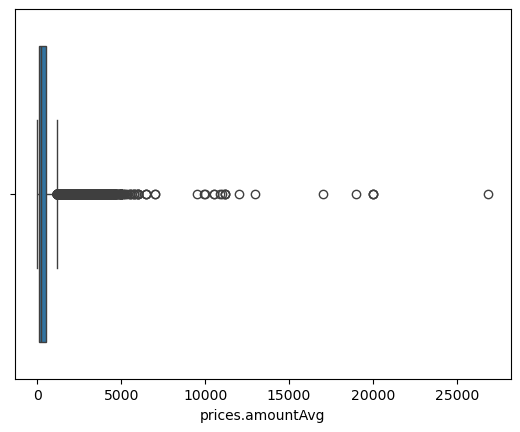

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['prices.amountAvg'])
plt.show()


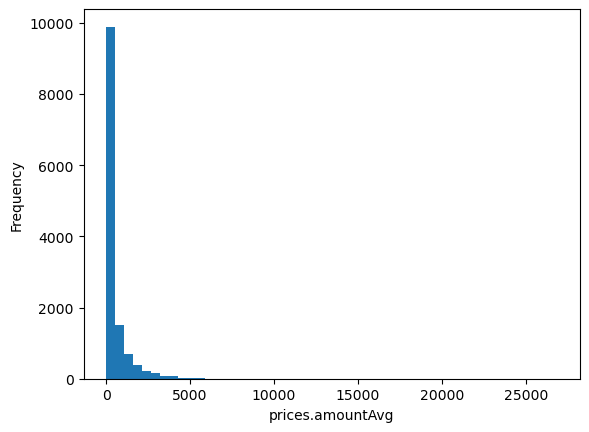

In [75]:
plt.hist(df['prices.amountAvg'], bins=50)
plt.xlabel('prices.amountAvg')
plt.ylabel('Frequency')
plt.show()


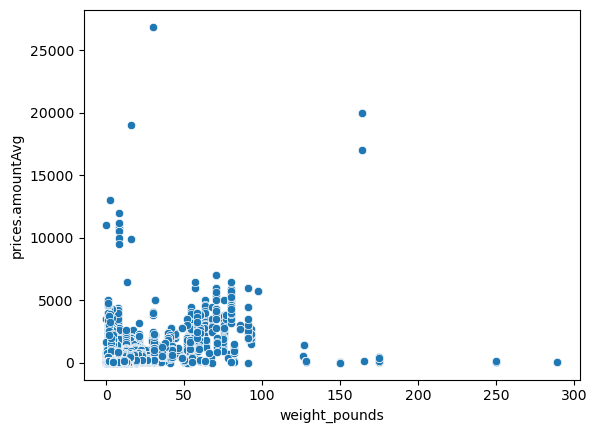

In [76]:
sns.scatterplot(x=df['weight_pounds'], y=df['prices.amountAvg'])
plt.show()


In [77]:
#Log Transformation: Apply a log transformation to reduce the impact of outliers - average price
df['prices.amountAvg'] = np.log1p(df['prices.amountAvg'])


In [78]:
#Log Transformation: Apply a log transformation to reduce the impact of outliers - weight
df['weight_pounds'] = np.log1p(df['weight_pounds'])

### Exploratory Data Analysis

Univariate - Numerical Analysis

In [79]:
df.describe()

,prices.dateSeen,dateAdded,dateUpdated,weight_pounds,prices.amountAvg,Audio&VideoAccessories,TVMounts,TVAccessories&Parts,Electronics,A/VPresentation,...,DVDBurners,Ipods&Mp3Players,SeemoreSamsungUN24H4500A24\\720pHDLEDLCDTelevis...,SeemoreUltimateEarsBOOM2PhantomPortableSpeaker...,SeemoreSamsungLevelUProActiveNoiseCancellingWi...,SeemoreJBLGX9633-Way6in.x9in.Speaker,BusinessLaptopPCs,SoundReinforcementMixers,USBMixers,DJMixers
count,13084,13084,13084,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,...,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000,13084.000000
mean,2018-01-16 13:01:06.860287488,2016-09-01 23:00:14.715377664,2018-06-07 14:52:29.133980416,2.020654,5.381773,0.032330,0.008101,0.009095,0.970116,0.002293,...,0.001758,0.001987,0.001376,0.000611,0.001223,0.000611,0.001299,0.001146,0.001146,0.001146
min,2014-08-30 16:00:00,2014-02-20 04:49:39,2018-01-02 21:14:37,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-09-18 09:00:00,2015-11-08 05:01:23,2018-06-05 22:49:54,1.163151,4.394326,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018-05-26 15:00:00,2017-01-07 19:00:32,2018-06-13 19:51:33,2.001480,5.293305,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018-05-26 15:00:00,2017-07-09 19:54:08,2018-06-30 02:25:22,2.602690,6.234396,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2018-07-25 23:00:00,2018-05-29 01:36:34,2018-07-26 16:01:58,5.669881,10.198840,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,NaN,NaN,1.058383,1.284379,0.176881,0.089646,0.094937,0.170273,0.047831,...,0.041892,0.044535,0.037067,0.024721,0.034949,0.024721,0.036024,0.033841,0.033841,0.033841


In [80]:
#kurtois and skewness
print('Kurtosis:', df['prices.amountAvg'].kurt())
print('Skewness:', df['prices.amountAvg'].skew())


Kurtosis: -0.26874546699683455
Skewness: 0.18591809797195596


C:\Users\fjkha\AppData\Local\Temp\ipykernel_12048\3936902782.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['prices.amountAvg'])


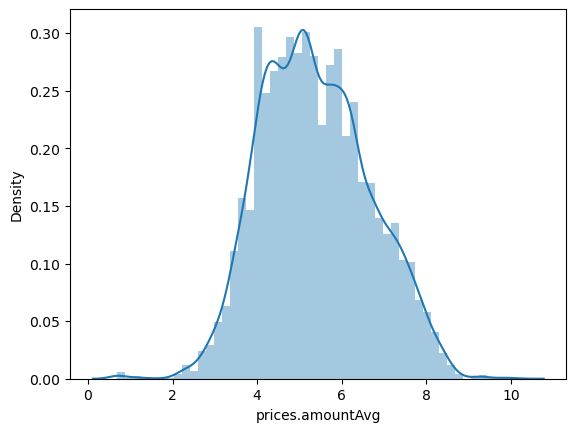

In [81]:
#plot the distribution of 'prices.amountAvg'
sns.distplot(df['prices.amountAvg'])
plt.show()


C:\Users\fjkha\AppData\Local\Temp\ipykernel_12048\3912067294.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['weight_pounds'])


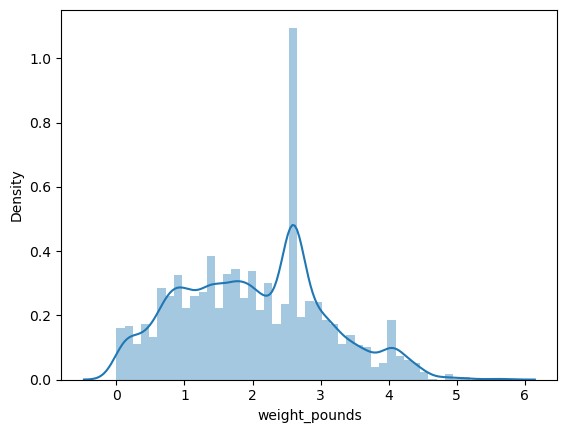

In [82]:
#plot the distribution of 'weight_pounds'
sns.distplot(df['weight_pounds'])
plt.show()

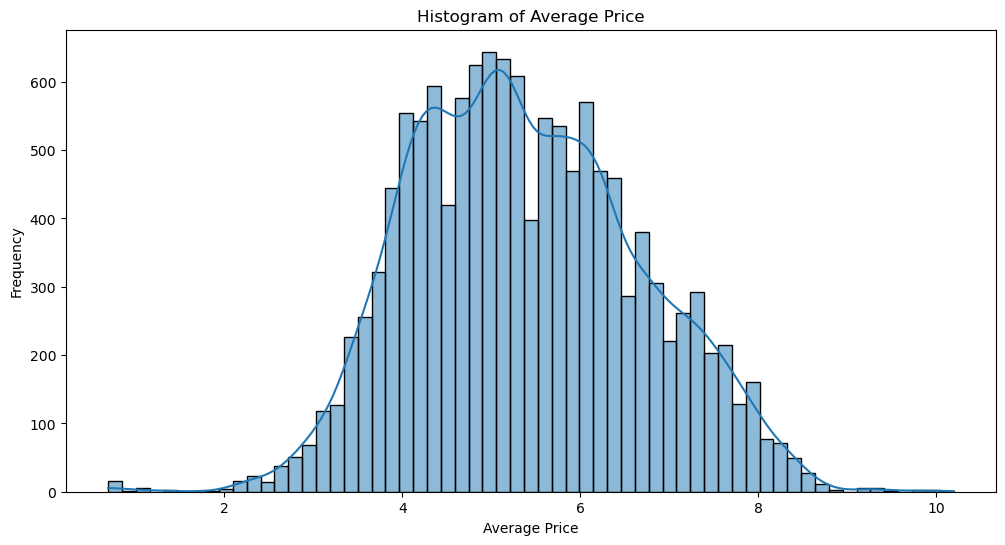

In [83]:
#Distribution Plots: Use histograms, KDE plots, or box plots to understand the distribution.
#Histogram of the 'prices.amountAvg' column
plt.figure(figsize=(12, 6))
sns.histplot(df['prices.amountAvg'], kde=True)
plt.title('Histogram of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

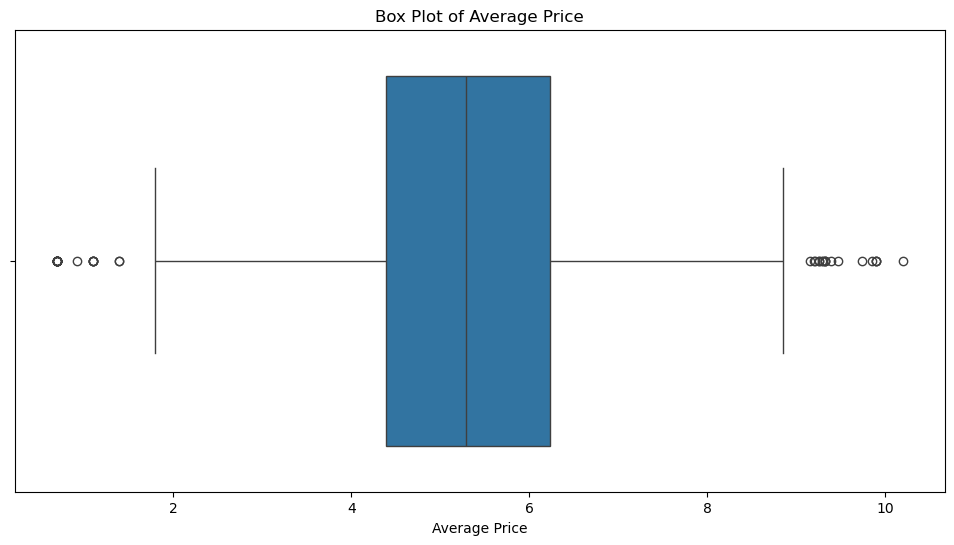

In [84]:
#Outlier Detection: Use box plots or Z-score analysis to identify outliers.
#Box plot of the 'prices.amountAvg' column
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['prices.amountAvg'])
plt.title('Box Plot of Average Price')
plt.xlabel('Average Price')
plt.show()

Univariate - Categorical Analysis

In [85]:
#Frequency distribution of the 'primaryCategories' column
df['primaryCategories'].value_counts()


primaryCategories
Electronics              13007
Electronics,Furniture       31
 Apple CarPlay              27
 Intel Celeron              12
 Siri Eyes Free              6
Electronics,Media            1
Name: count, dtype: int64

In [86]:
#Frequency distribution of the 'brand' column
df['brand'].value_counts()

brand
Sony              1500
Samsung           1202
Apple              981
Pioneer            292
Yamaha             288
                  ... 
Audio-Technica       1
Soundcast            1
j5create             1
Pro-Ject             1
HyperX               1
Name: count, Length: 309, dtype: int64

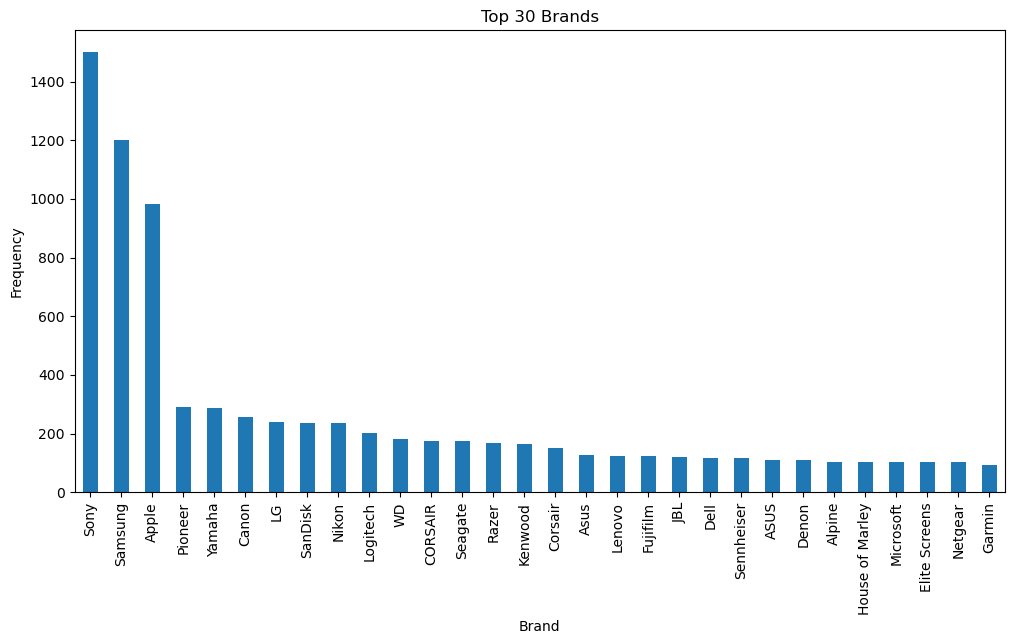

In [87]:
#Bar Plots: Visualize the distribution of brand limit to top 20 in descending order using bar plot
plt.figure(figsize=(12, 6))
df['brand'].value_counts().head(30).plot(kind='bar')
plt.title('Top 30 Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.show()



Multivariate Analysis - Numerical vs Numerical

In [88]:
#split df into categorical and numerical columns for EDA analysis
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


In [89]:
#Correlation Matrix: Use a correlation matrix to understand the relationships between numerical features.
#Correlation matrix of numerical columns
#plt.figure(figsize=(12, 6))
#sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()



The graph suggest a moderate significance between weight and price.  As weight increases, so does price, but the correlation is not strong enough and needs to be coupled with more attributes for modelling. 

In [90]:
#Scatter Plots: Visualize relationships between pairs of numerical variables.
#Scatter plot of 'numerical_columns'
#plt.figure(figsize=(12, 6))
#sns.pairplot(df[numerical_columns])
#plt.show()


Multivariate - Numerical vs. Categorical:


In [91]:
#Box plot of 'prices.amountAvg' vs 'prices.condition' using plotly.graph_objects
fig = go.Figure()
fig.add_trace(go.Box(x=df['prices.condition'], y=df['prices.amountAvg'], boxmean='sd'))
fig.update_layout(title='Box Plot of Average Price by Condition', xaxis_title='Condition', yaxis_title='Average Price')
fig.show()
#Violin Plots: Similar to box plots but also show the distribution density.
#Groupby Analysis: Use groupby to aggregate numerical data based on categories and compute summary statistics (mean, median, etc.).

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Bestbuy.com'),
  Text(1, 0, 'bhphotovideo.com'),
  Text(2, 0, 'Walmart.com'),
  Text(3, 0, 'Beach Camera'),
  Text(4, 0, 'AMI Ventures Inc'),
  Text(5, 0, 'buydig'),
  Text(6, 0, 'Focus Camera'),
  Text(7, 0, 'Best Buy'),
  Text(8, 0, 'Beach Audio Inc'),
  Text(9, 0, 'echo-and-optics'),
  Text(10, 0, 'World Wide Stereo'),
  Text(11, 0, 'Newegg'),
  Text(12, 0, 'UnbeatableSale'),
  Text(13, 0, 'BuyVPC'),
  Text(14, 0, 'DealClock'),
  Text(15, 0, 'gear4less'),
  Text(16, 0, 'Electronics Expo (Authorized Dealer)'),
  Text(17, 0, 'OneCall'),
  Text(18, 0, 'electronic_express'),
  Text(19, 0, 'pcRUSH - Walmart.com')])

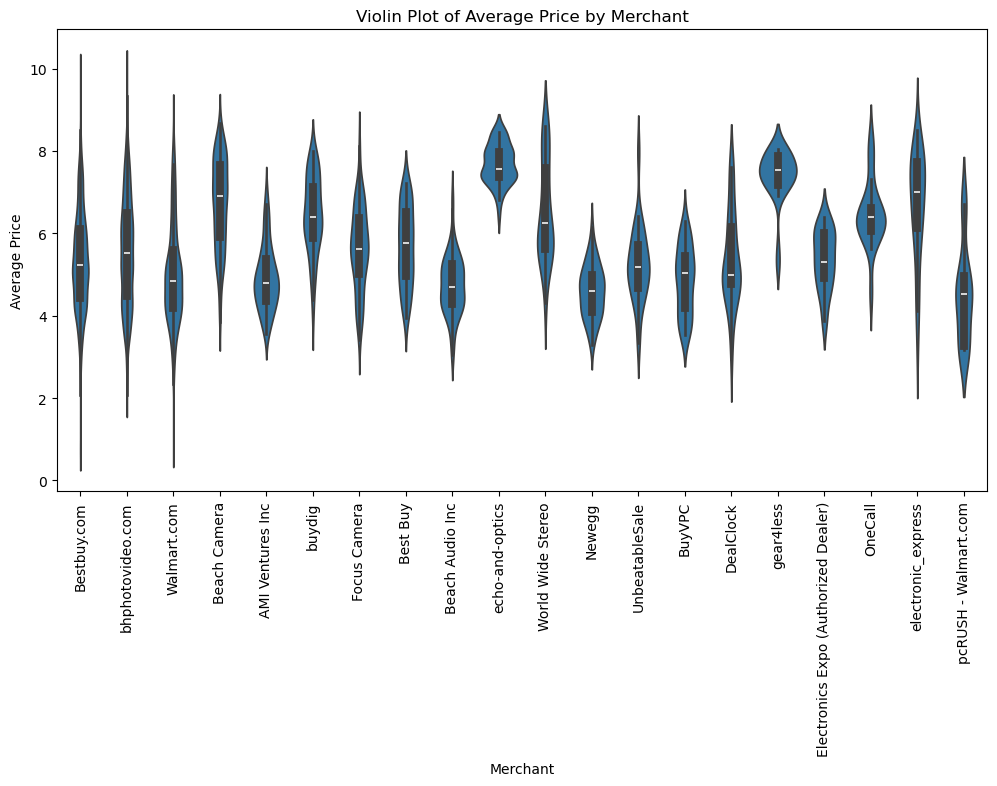

In [92]:
#Violin plot of 'prices.amountAvg' vs 'merchant' in descending order limited to top 20 merchants
plt.figure(figsize=(12, 6))
sns.violinplot(x='prices.merchant', y='prices.amountAvg', data=df, order=df['prices.merchant'].value_counts().iloc[:20].index)
plt.title('Violin Plot of Average Price by Merchant')
plt.xlabel('Merchant')
plt.ylabel('Average Price')
plt.xticks(rotation=90)


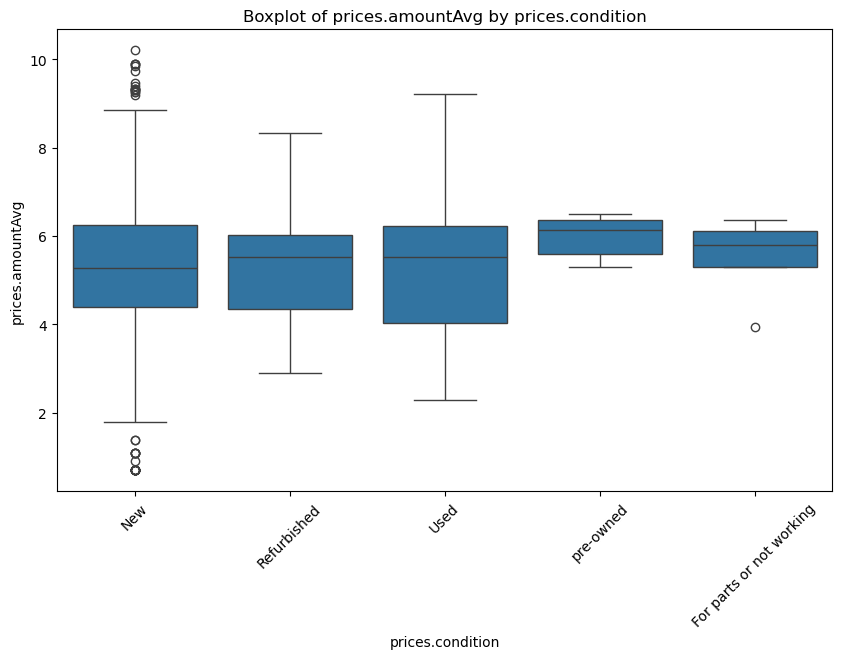

In [93]:
#boxplot on prices.amountAvg column
plt.figure(figsize=(10, 6))
sns.boxplot(x='prices.condition', y='prices.amountAvg', data=df)
plt.title('Boxplot of prices.amountAvg by prices.condition')
plt.xticks(rotation=45)
plt.show()

In [94]:
#time series plot of prices.amountAvg by dateAdded
#plt.figure(figsize=(10, 6))
#sns.lineplot(x='dateAdded', y='prices.amountAvg', data=df)
#plt.title('Time series plot of prices.amountAvg by dateAdded')
#plt.xticks(rotation=45)
#plt.show()

In [95]:
#time series plot of prices.amountAvg by dateUpdated
#plt.figure(figsize=(10, 6))
#sns.lineplot(x='dateUpdated', y='prices.amountAvg', data=df)
#plt.title('Time series plot of prices.amountAvg by dateUpdated')
#plt.xticks(rotation=45)
#plt.show()

In [96]:
#time series plot of prices.amountAvg by prices.dateSeen
#plt.figure(figsize=(10, 6))
#sns.lineplot(x='prices.dateSeen', y='prices.amountAvg', data=df)
#plt.title('Time series plot of prices.amountAvg by prices.dateSeen')
#plt.xticks(rotation=45)
#plt.show()

Multivariate analysis - Categorical VS Categorical

In [97]:
# Generating a multivariate crosstab for all categorical columns
#for i in range(0, len(categorical_columns)):
    #for j in range(i+1, len(categorical_columns)):
        #cross_tab = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
        #print(cross_tab)
        #print('\n\n')

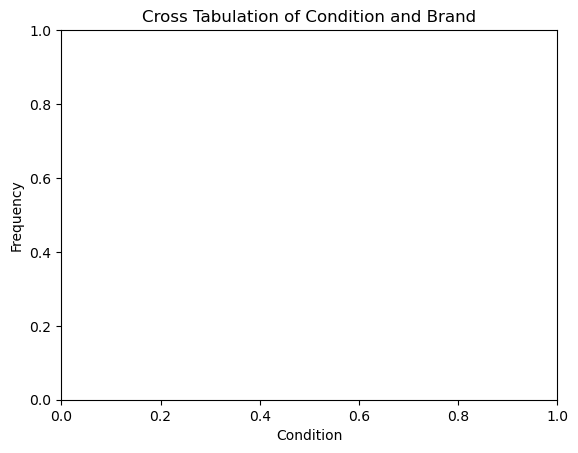

In [98]:
# Plotting the results for 'cross_tab' data for columns 'prices.condition' and 'brand' limited to top 10 brands
#cross_tab = pd.crosstab(df['prices.condition'], df['brand'])
#cross_tab = cross_tab.loc[:, cross_tab.sum().sort_values(ascending=False).index[:10]]
#cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cross Tabulation of Condition and Brand')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()


In [99]:
#chi-square test on categorical columns


In [100]:
#chi-square test on categorical columns
#from scipy.stats import chi2_contingency
#for i in range(0, len(categorical_columns)):
    #for j in range(i+1, len(categorical_columns)):
        #cross_tab = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
        #chi2, p, dof, ex = chi2_contingency(cross_tab)
        #print('Chi2 Statistic: ', chi2)
        #print('P-Value: ', p)
        #print('Degrees of Freedom: ', dof)
        #print('\n\n')

Summarize the findings of chi-square test

#The chi-square test results show that there is a significant relationship between the following columns:

- prices.condition and prices.merchant
- prices.condition and prices.availability
- prices.condition and prices.shipping
- prices.condition and prices.sourceURLs
- prices.condition and prices.dateSeen
- prices.condition and prices.dateAdded
- prices.condition and prices.dateUpdated
- prices.condition and prices.currency
- prices.condition and prices.amountMin
- prices.condition and prices.amountMax
- prices.condition and prices.amountAvg
- prices.condition and weight_pounds



In [101]:
#Check for the distribution of the data
#fig = px.histogram(df, x='brand')
#fig.show()